## import and preprocess the data

### import

In [1]:
import sklearn

import numpy as np
import pandas as pd
import os
import tarfile
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Take a Quick Look at the Data Structure

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Create a Test Set

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [15]:
housing = strat_train_set.copy()

### Prepare the Data for Machine Learning Algorithms

In [16]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [17]:
# pipeline을 사용해서 여러가지 작업을 한꺼번에 진행할 수도 있다.
# 아래의 Pipeline에서는 결측치를 채워주고, 몇가지 feature들을 추가하고, 스케일링을 하는 작업들이 순차적으로 진행
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [18]:
# Pipeline과 비슷하게 사용할 수 있다.
# num_attribs에게는 num_pipeline을 , cat_attribs에게는 OneHotEncoder를 적용한다.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
housing_num = housing.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [19]:
housing_prepared.shape

(16512, 16)

## P1

### 1.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'kernel': ['linear', 'rbf'], 
         'C': [0.1, 1, 10],
         'gamma': [0.1,1, 10]}

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=2, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  10.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  10.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  21.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  29.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  12.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   9.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  21.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  26.8s
[CV] END .....................C=0.1, gamma=10, kernel=linear; total time=  14.2s
[CV] END .....................C=0.1, gamma=10, kernel=linear; total time=  11.5s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=  22.7s
[CV] END ........................C=0.1, gamma=10

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [21]:
negative_mse = grid_search.best_score_
rmse = (-negative_mse) ** 0.5
rmse

91642.74355009082

In [22]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

### 2.

* Test different scalers(Standard, MinMax, Robust)

In [23]:
housing_search = pd.get_dummies(housing, prefix="", prefix_sep = "",columns = ['ocean_proximity'])
column_list = housing_search.columns.tolist()
housing_search.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0,1,0,0,0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0,0,0,0,1
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0,1,0,0,0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0,0,0,0,1
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1,0,0,0,0


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_search = imputer.fit_transform(housing_search)

In [25]:
housing_search = pd.DataFrame(housing_search, columns=column_list)
housing_search.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.0,1.0,0.0,0.0,0.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,0.0,1.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.0,1.0,0.0,0.0,0.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,0.0,1.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin

class ScalerSelector(BaseEstimator, TransformerMixin):
  def __init__(self, scaler=None):
    super().__init__()
    self.scaler = scaler
  def fit(self, X, y=None):
    return self.scaler.fit(X)
  def transform(self, X, y=None):
    return self.scaler.transform(X)
column_list = housing_search.columns.tolist()
scaler = ScalerSelector()
preprocessor = ColumnTransformer(transformers=[('numerical', scaler, column_list)])

pipeline = Pipeline(steps = [('preprocessor',preprocessor),('svr',SVR())])
param_grid = {'preprocessor__numerical__scaler':[StandardScaler(), RobustScaler(), MinMaxScaler()],
              'svr__C':[0.1, 1, 10],
              'svr__gamma':[0.1, 1, 10]}

grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_search, housing_labels)        

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=0.1, svr__gamma=0.1; total time=  28.9s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=0.1, svr__gamma=0.1; total time=  21.4s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=0.1, svr__gamma=1; total time=  26.4s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=0.1, svr__gamma=1; total time=  23.8s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=0.1, svr__gamma=10; total time=  23.0s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=0.1, svr__gamma=10; total time=  28.7s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=1, svr__gamma=0.1; total time=  21.4s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=1, svr__gamma=0.1; total time=  21.8s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=1, svr__gamma=1; total time=  28.0s

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         ScalerSelector(),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income',
                                                                          '<1H '
                                                                          'OCEAN',
                                                                          'INLAND',
                                                                          'ISLAND',
                                                                          'NEAR '
                                                                          'BAY',
                                                                          'NEAR '
                                                                          'OCEAN'])])),
                                       ('svr', SVR())]),
             param_grid={'preprocessor__numerical__scaler': [StandardScaler(),
                                                             RobustScaler(),
                                                             MinMaxScaler()],
                         'svr__C': [0.1, 1, 10], 'svr__gamma': [0.1, 1, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [27]:
negative_mse = grid_search.best_score_
rmse = (-negative_mse) ** 0.5
rmse

116098.04087771784

In [28]:
grid_search.best_params_

{'preprocessor__numerical__scaler': MinMaxScaler(),
 'svr__C': 10,
 'svr__gamma': 1}

In [30]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'preprocessor__numerical__scaler':[StandardScaler(), RobustScaler(), MinMaxScaler()],
              'svr__C': np.logspace(-1, 3),
              'svr__gamma':np.logspace(-1, 3)}

random_search = RandomizedSearchCV(pipeline, param_distributions = param_dist, cv=2, n_iter=20, scoring='neg_mean_squared_error', verbose=2)
random_search.fit(housing_search, housing_labels)    

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END preprocessor__numerical__scaler=MinMaxScaler(), svr__C=104.81131341546853, svr__gamma=1.151395399326447; total time=  22.5s
[CV] END preprocessor__numerical__scaler=MinMaxScaler(), svr__C=104.81131341546853, svr__gamma=1.151395399326447; total time=  24.9s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=0.3088843596477481, svr__gamma=104.81131341546853; total time=  31.5s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=0.3088843596477481, svr__gamma=104.81131341546853; total time=  35.5s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=2.442053094548651, svr__gamma=19.306977288832496; total time=  25.2s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=2.442053094548651, svr__gamma=19.306977288832496; total time=  23.8s
[CV] END preprocessor__numerical__scaler=StandardScaler(), svr__C=5.17947467923121, svr__gamma=13.257113655901081; total time=  25.

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               ScalerSelector(),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income',
                                                                                '<1H '
                                                                                'OCEAN',
                                                                                'INLAND',
                                                                                'ISLAND',
                                                                                'NEAR '
                                                                                'BAY',
                                                                                'NEAR '
                                                                                'OCEAN'])])),
                                             ('svr', SVR())]),
                   n_iter=20,
                   param_distributi...
       1.93069773e+01, 2.32995181e+01, 2.81176870e+01, 3.39322177e+01,
       4.09491506e+01, 4.94171336e+01, 5.96362332e+01, 7.19685673e+01,
       8.68511374e+01, 1.04811313e+02, 1.26485522e+02, 1.52641797e+02,
       1.84206997e+02, 2.22299648e+02, 2.68269580e+02, 3.23745754e+02,
       3.90693994e+02, 4.71486636e+02, 5.68986603e+02, 6.86648845e+02,
       8.28642773e+02, 1.00000000e+03])},
                   scoring='neg_mean_squared_error', verbose=2)

In [31]:
negative_mse = random_search.best_score_
rmse = (-negative_mse) ** 0.5
rmse

91673.89360493912

In [32]:
random_search.best_params_

{'svr__gamma': 0.5428675439323859,
 'svr__C': 686.6488450042998,
 'preprocessor__numerical__scaler': RobustScaler()}

## P2~P5

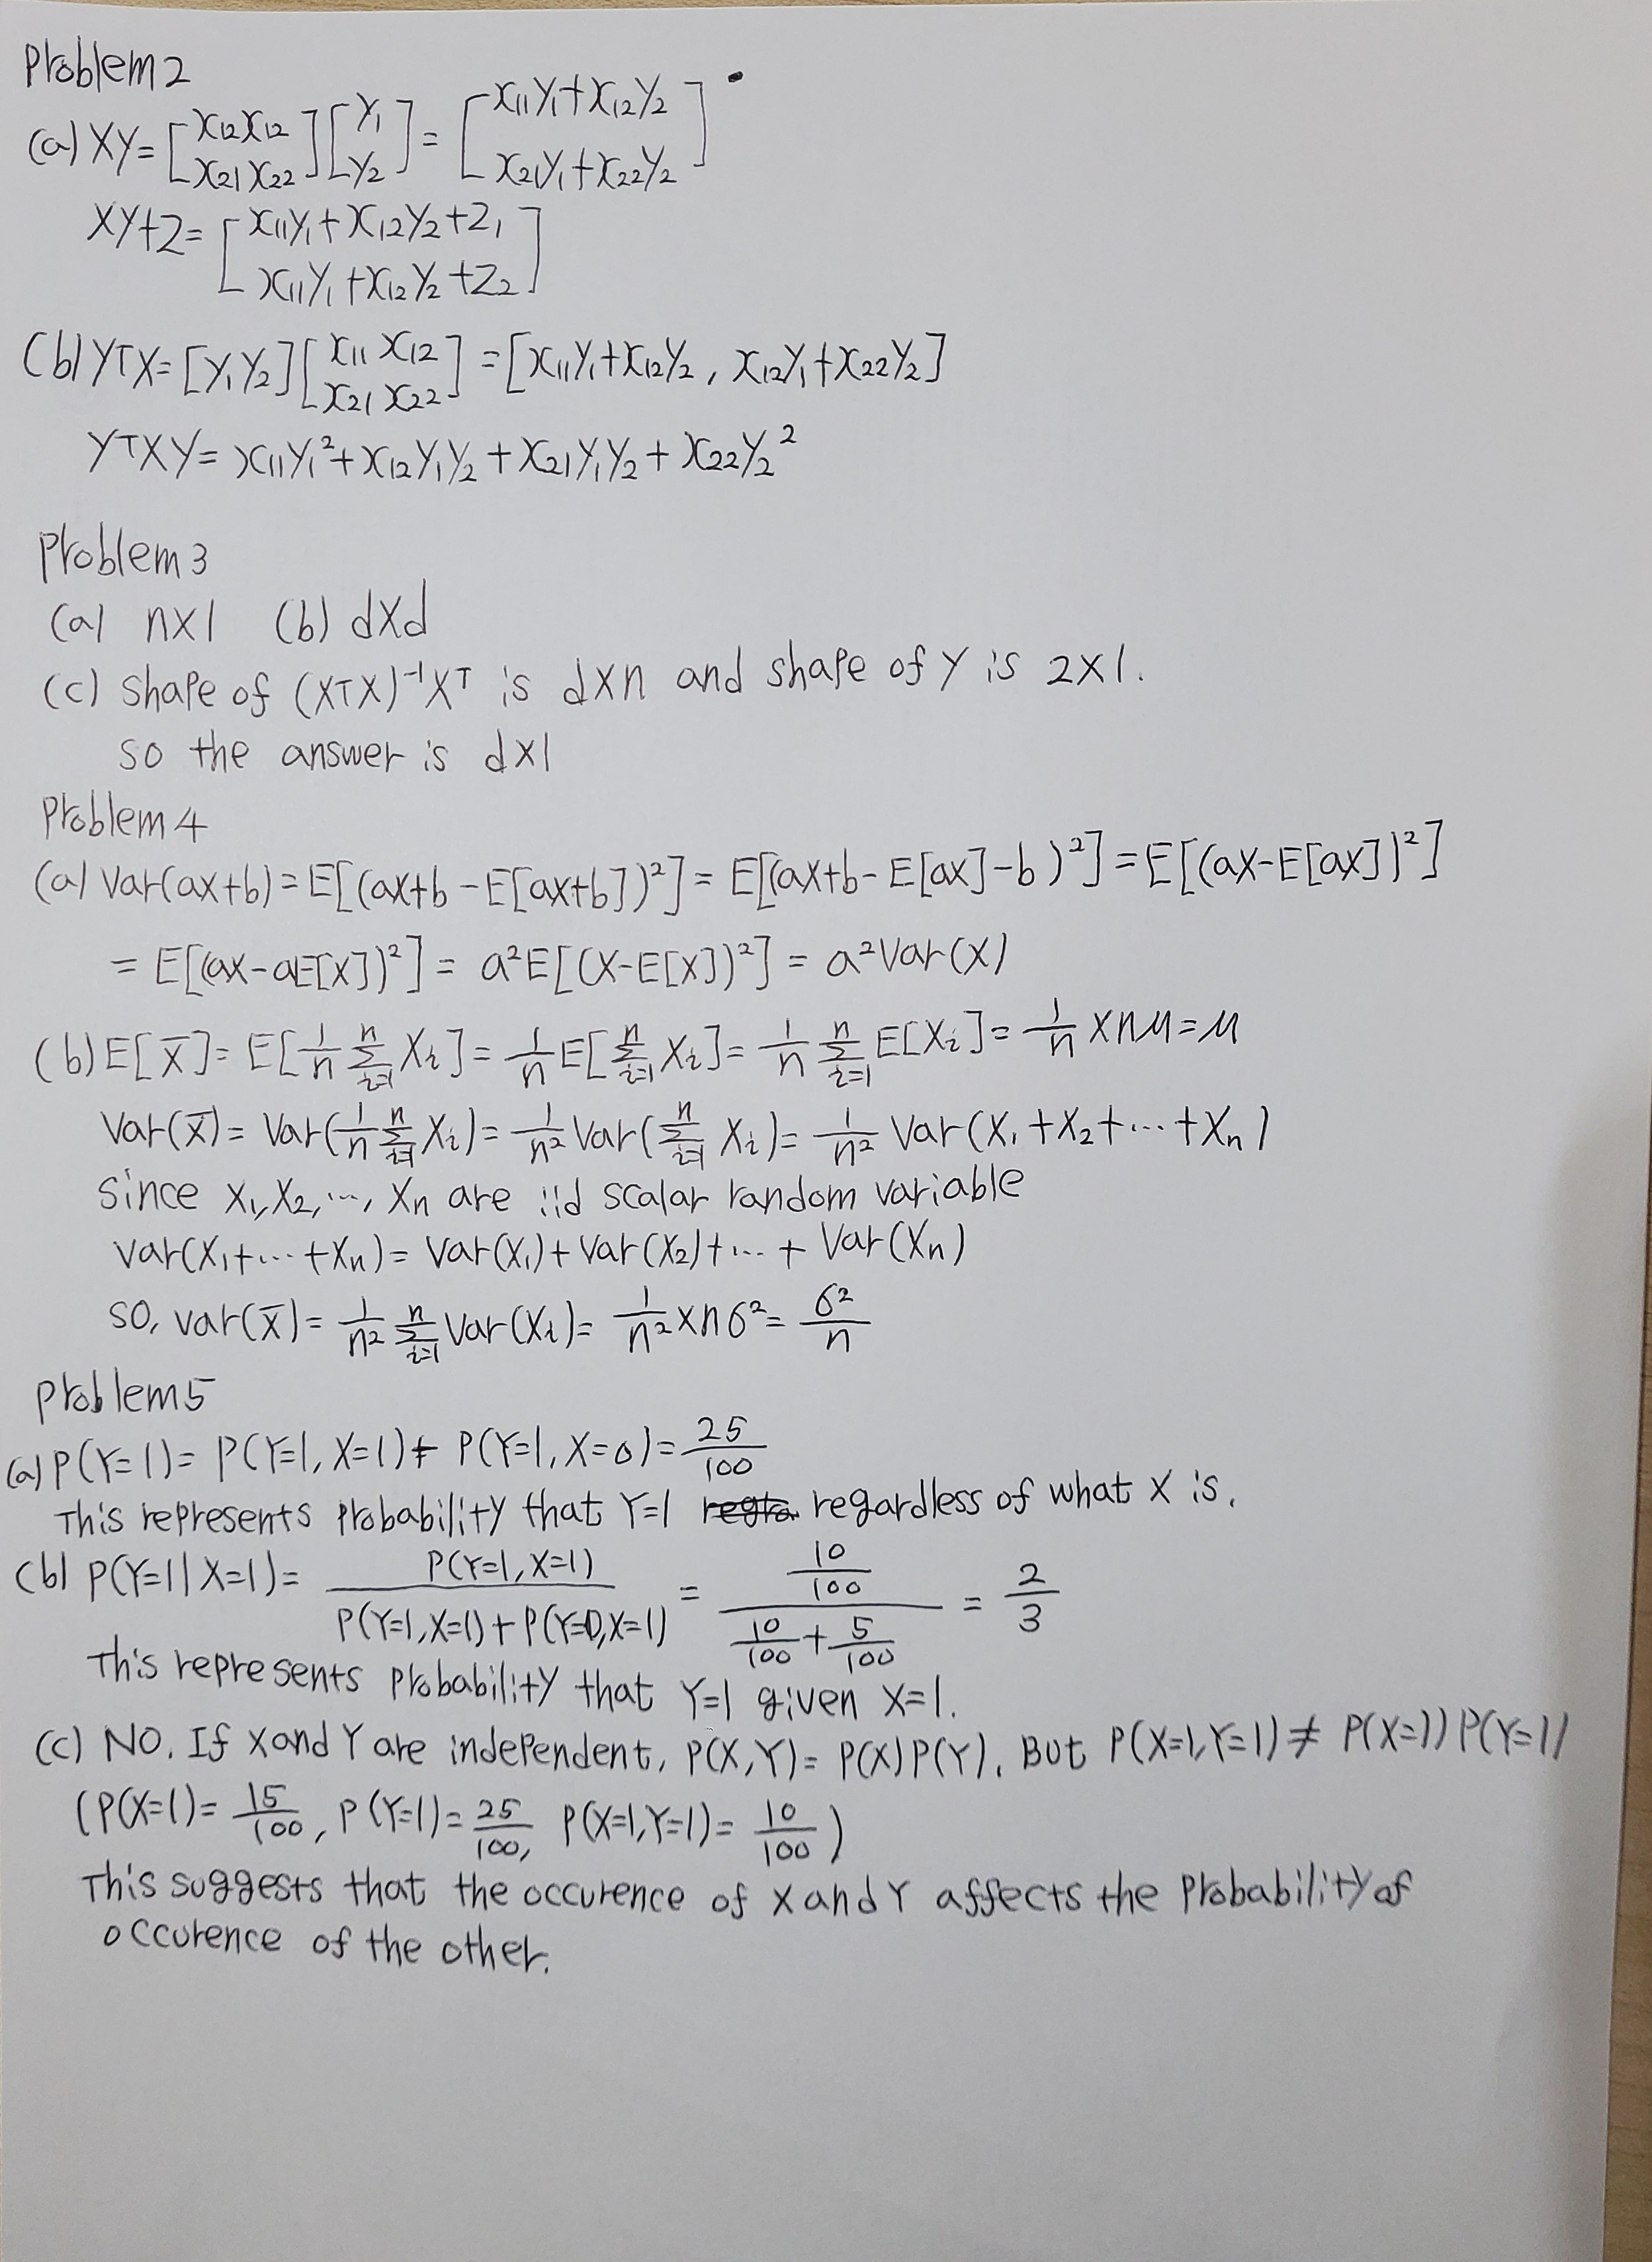